<a href="https://colab.research.google.com/github/2303a52351/AIML_2303a52351/blob/main/aiml_labexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIML LAB EXTERNAL (2024 – 25)
SET – 5 (Decision Tree)
1. Build a decision tree classifier and visualize the tree.
2. Evaluate the model's performance using accuracy and confusion matrix.
3. Implement pruning (set max_depth or min_samples_split) and compare
accuracy.
4. Use the decision tree to identify the most important feature(s).
5. Compare the decision tree model’s performance with and without pruning.

# 1.Build a decision tree classifier and visualize the tree




In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
file_path = '/content/weather_forecast_data.csv'
data = pd.read_csv(file_path)


In [3]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain


In [6]:
target_column = 'Rain'
X = data.drop(columns=[target_column])
y = data[target_column]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

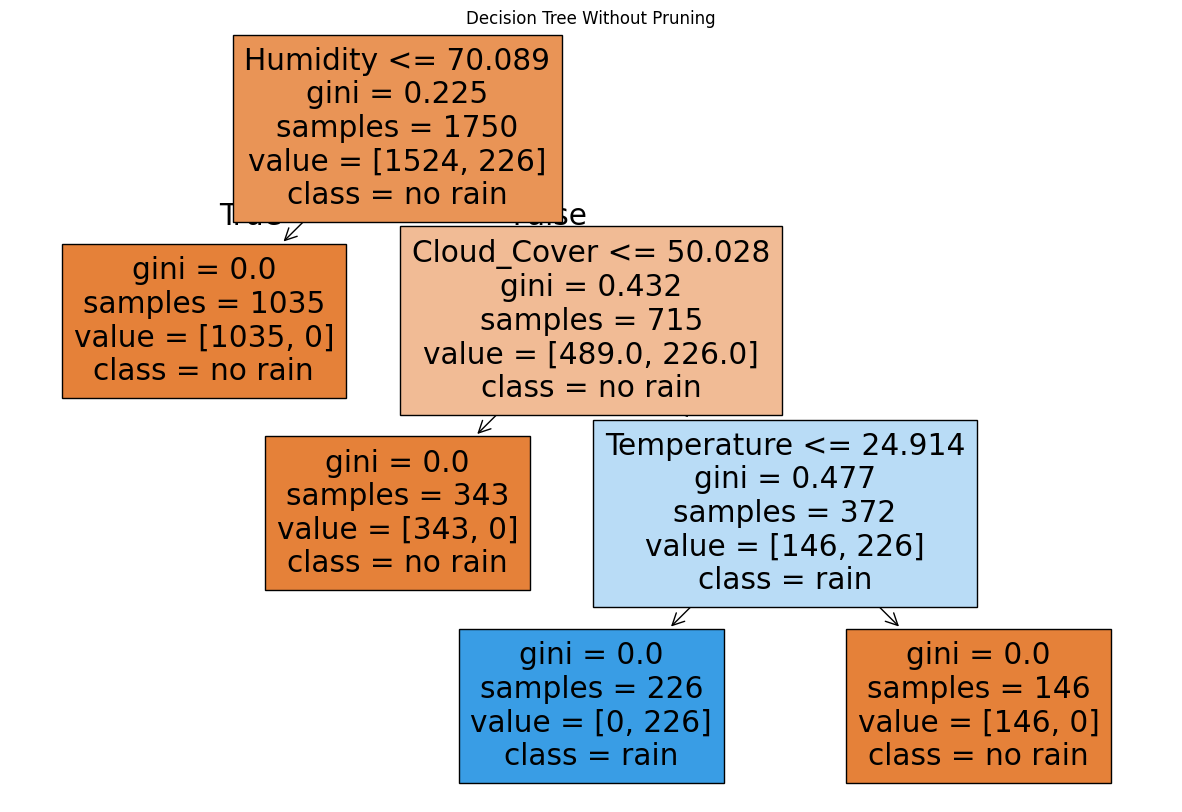

In [17]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True) # Changed line: removed str() from class_names
plt.title("Decision Tree Without Pruning")
plt.show()


In [ ]:
(0)

# 2. Evaluate the Model's Performance Using Accuracy and Confusion Matrix


In [19]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy without pruning: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy without pruning: 1.0
Confusion Matrix:
[[662   0]
 [  0  88]]


# 3. Implement Pruning (Set max_depth or min_samples_split) and Compare Accuracy

In [20]:
pruned_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

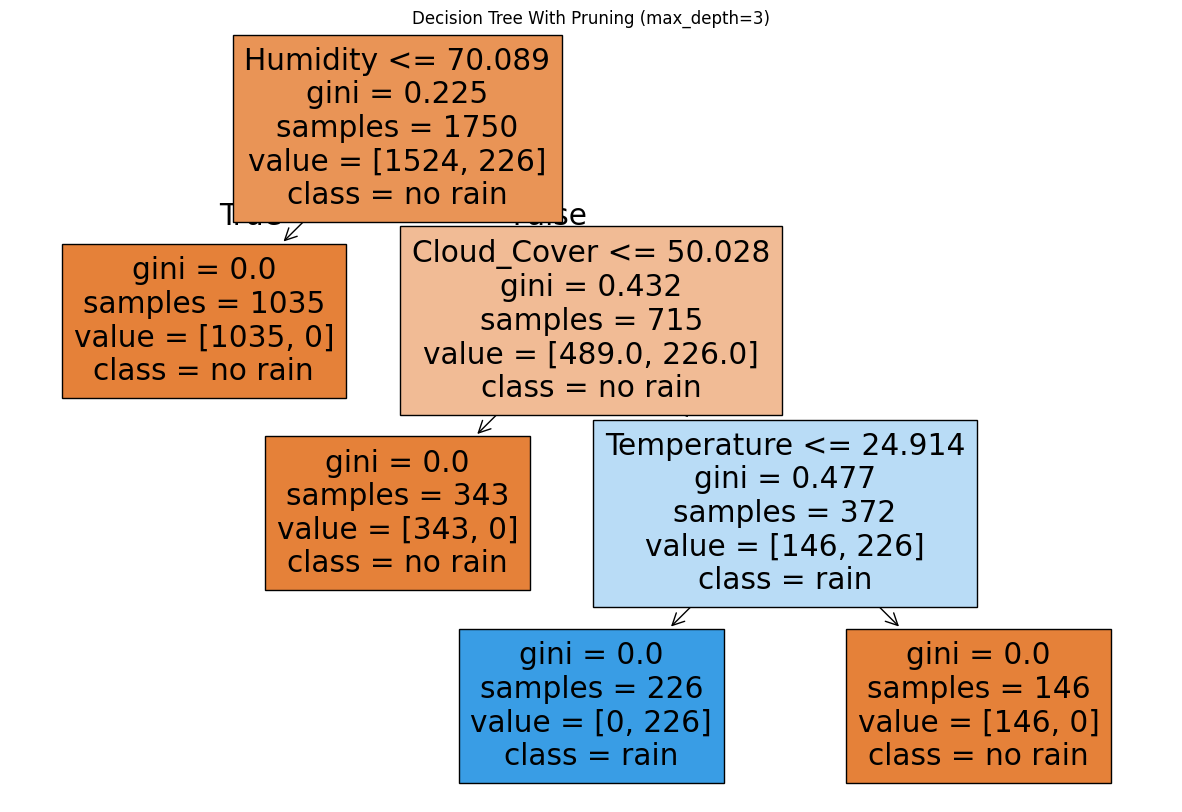

In [22]:
plt.figure(figsize=(15, 10))
# Removed str() from pruned_clf.classes_ as it's already a numpy array
plot_tree(pruned_clf, feature_names=X.columns, class_names=pruned_clf.classes_, filled=True)
plt.title("Decision Tree With Pruning (max_depth=3)")
plt.show()


In [24]:
y_pred_pruned = pruned_clf.predict(X_test)
pruned_accuracy = accuracy_score(y_test, y_pred_pruned)

print(f"Accuracy with pruning: {pruned_accuracy}")



Accuracy with pruning: 1.0


# Use the Decision Tree to Identify the Most Important Features

In [25]:
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
       Feature  Importance
0  Temperature    0.450675
3  Cloud_Cover    0.334662
1     Humidity    0.214663
2   Wind_Speed    0.000000
4     Pressure    0.000000


# Compare the Decision Tree Model’s Performance With and Without Pruning

In [26]:
print(f"Performance Comparison:")
print(f"Accuracy Without Pruning: {accuracy}")
print(f"Accuracy With Pruning: {pruned_accuracy}")

Performance Comparison:
Accuracy Without Pruning: 1.0
Accuracy With Pruning: 1.0
